# Metric: Crime/Safety

#### by Ryan Novak

For my metric I chose to look at the number of arrests in each neighborhood in order to gauge their respective safety. I used a data set Titled Pittsburgh Police Arrest Data, which listed every arrest reported in 2016, and luckily for my purposes the neighborhood the arrest took place in. Using that I simply have to compare the neighborhoods and see which are the safest to be in.

To begin I need to import all of the librarys that I'll be using.

In [46]:
# Importing necessary items

import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

Next I have to read the dataset and shape file into my notebook and store them as variables

In [56]:
#reading in the csv and shapes files

df = pd.read_csv('crime_data.csv')
shape = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
print(df.head(1))

        PK       CCR   AGE GENDER RACE           ARRESTTIME  \
0  1975272  16158872  42.0      F    B  2016-08-24T12:20:00   

                              ARRESTLOCATION            OFFENSES  \
0  4700 Block Centre AV Pittsburgh, PA 15213  3929 Retail Theft.   

                            INCIDENTLOCATION INCIDENTNEIGHBORHOOD  \
0  4700 Block Centre AV Pittsburgh, PA 15213           Bloomfield   

  INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION  \
0            5          804.0               8.0                    2.0   

           X          Y  
0 -79.949277  40.452551  


My current dataset is pretty hard to read and contains a lot of unneeded information, so I'll be removing all of the unnecessaary data and sorting it by counts of incidents in each neighborhood.

In [57]:
# Create new dataset only containing the number of arrests per neighborhood


df['count'] = 1
dfNew = df.groupby(['INCIDENTNEIGHBORHOOD']).count().sort_values('count')['count']
dfNew = dfNew.reset_index()
dfNew = dfNew.loc[(dfNew['count'] > 10)] # removing outliers with only a few entries

print(dfNew)

         INCIDENTNEIGHBORHOOD  count
2             Mt. Oliver Boro     18
3           Central Northside     23
4                   Ridgemont     35
5               Regent Square     35
6               New Homestead     39
..                        ...    ...
93             Homewood South   1948
94             East Allegheny   2021
95                    Carrick   2203
96           South Side Flats   3190
97  Central Business District   3800

[96 rows x 2 columns]


Thats much better. The reason that I only kept counts above ten is that there were a couple of very low count outliers that were just different spellings of much more frequently reported neighborhoods. It's likely just an issue with the dataset itself, so for simplicity sake I removed them as to not make the graphs too confusing.

First I'll graph the 10 neighborhoods with most reported crime to see where the most dangerous places to live are.

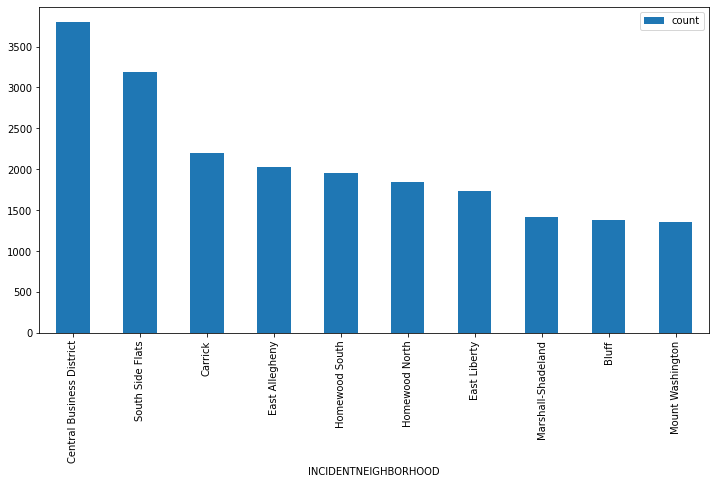

In [60]:

dfPlot = dfNew.sort_values(by='count', ascending=False)
dfPlot.head(10).plot.bar(x='INCIDENTNEIGHBORHOOD', y='count', figsize=(12,6))

Then I'll do the same with the 10 safest neighborhoods

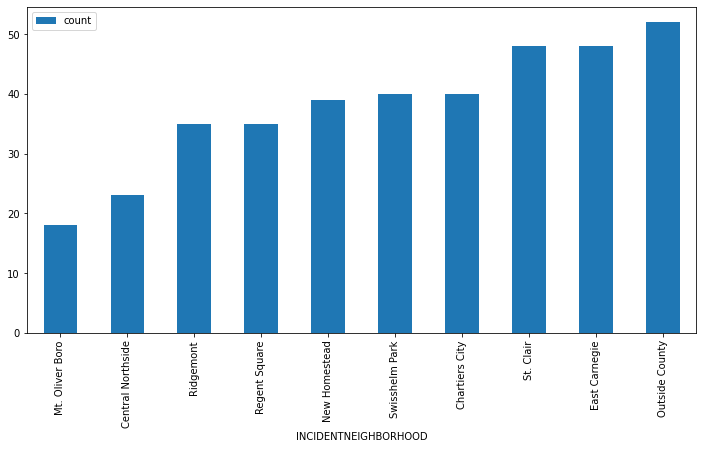

In [64]:
dfPlot = dfNew.sort_values(by='count', ascending=True)
dfPlot.head(10).plot.bar(x='INCIDENTNEIGHBORHOOD', y='count', figsize=(12,6))


Next we create a heat map by merging the dataset with the shape file of Pittsburgh neighborhoods. There were a few more neighborhoods found in the crime dataset, likely due to slightly different names for neighborhoods being used in some reports (For example Mt Oliver neighborhood and Mt Oliver borough are the same area on the shapeplot), but for the most part the data merged cleanly.

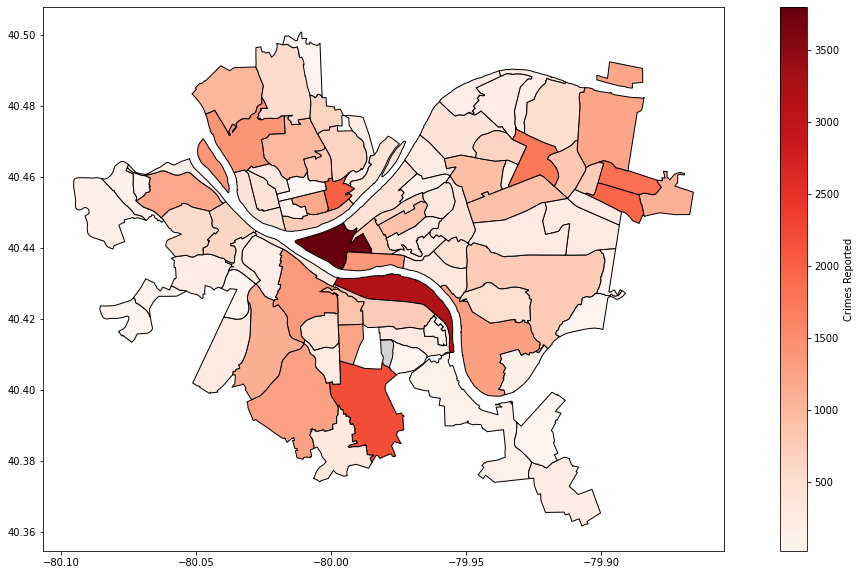

In [31]:
CrimeRateMap = shape.merge(   # Merging data ser with shape file
    dfNew,
    how='left',
    left_on='hood',
    right_on='INCIDENTNEIGHBORHOOD')

CrimeRateMap.plot(column='count',  # printing map
               cmap='Reds',                                         
               edgecolor="black",                                     
               legend=True,                                           
               legend_kwds={'label': "Crimes Reported"},                
               figsize=(20, 10),                                    
               missing_kwds={"color": "lightgrey"}                   
               )

The map just creates a better visualization of what we already knew from the bar graphs. The downtown area has the most crime, while a lot of the outer neighborhoods are far safer.

------------------
# Conclusion: 

The Central Bussiness District(Downtown) is by far the most crime ridden, meanwhile Mt. Oliver has the least reported crime. All of the 10 safest areas are pretty close in reported crime and would all be good places to raise a family. Going purely off numbers Mt. Oliver is the clear winner, but any of the bottom 10 would be a good choice.

The data as a whole makes a lot of sense to me, particularly after looking at the map. Downtown and all of the heavily populated areas in the center of the city have a lot more crime, while the more spread out, outer neighborhoods are a lot safer. As a whole the conclusion is pretty much what I expected, although beforehand I wouldn't have been able to guess which specific neighborhoods are the most/least safe, so it's interesting to have it down to pure numbers now.